<a href="https://colab.research.google.com/github/JotaPMendes/cursos/blob/main/pandas_data_view_2023/notebooks/pandas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de análise I

## Exportando a base de dados

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/aluguel.csv", sep=';')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


## Informações gerais sobre a base de dados

In [ ]:
df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [ ]:
df.shape

(32960, 9)

## Tipos de imóveis


In [ ]:
tipo_de_imovel = df['Tipo']
type(tipo_de_imovel)
tipo_de_imovel.drop_duplicates(inplace=True)

## Imóveis Residenciais


In [ ]:
list(df['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [ ]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila']

In [ ]:
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [ ]:
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [ ]:
selecao = df['Tipo'].isin(residencial)
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [ ]:
dados_residencial = df[selecao]

In [ ]:
list(dados_residencial['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [ ]:
dados_residencial.shape

(22580, 9)

In [ ]:
dados_residencial.index = range(dados_residencial.shape[0])

## Seleções e frequências

In [ ]:
# Selecione somente os imóveis classificados com tipo 'Apartamento'

apartamentos = df.query('Tipo == "Apartamento"')
apartamentos.shape

(19532, 9)

In [ ]:
# Selecione somente os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'
casas = df.query('Tipo in ["Casa","Casa de Condomínio","Casa de Vila"]')

In [ ]:
# Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites
entre60_100 = df.query('Area >=60 and Area <=100')
entre60_100

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
32947,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [ ]:
# Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2000,00
quartos4_menor2000 = df.query('Quartos >= 4 and Valor <= 2000')
quartos4_menor2000

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
701,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1465,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
2367,Apartamento,Tijuca,4,1,0,160,2000.0,1032.0,1056.0
2874,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
3000,Apartamento,Tijuca,4,1,2,190,2000.0,1247.0,353.0
...,...,...,...,...,...,...,...,...,...
30599,Apartamento,Campo Grande,4,2,1,140,2000.0,600.0,NaN
30670,Apartamento,Barra da Tijuca,4,3,4,148,1500.0,1600.0,196.0
31382,Apartamento,Vargem Grande,4,0,1,180,1900.0,NaN,176.0
31840,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,1038.0,NaN


In [ ]:
dados_residencial[dados_residencial['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [ ]:
A = dados_residencial.shape[0]
dados_residencial.dropna(subset = ['Valor'], inplace = True)
B = dados_residencial.shape[0]
A - B

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


9

## Tratamento de dados faltantes

In [ ]:
dados_residencial[dados_residencial['Condominio'].isnull()].shape[0]

1813

In [ ]:
selecao = (dados_residencial['Tipo'] == 'Apartamento') & (dados_residencial['Condominio'].isnull())
selecao

0        False
1        False
2        False
3        False
4         True
         ...  
22575    False
22576    False
22577    False
22578    False
22579    False
Length: 22571, dtype: bool

In [ ]:
A = dados_residencial.shape[0]
dados_residencial = dados_residencial[~selecao]
B = dados_residencial.shape[0]
A - B

745

In [ ]:
dados_residencial[dados_residencial['Condominio'].isnull()].shape[0]

1068

In [ ]:
dados_residencial = dados_residencial.fillna({'Condominio': 0, 'IPTU' : 0})

In [ ]:
dados_residencial[dados_residencial['IPTU'].isnull()].shape[0]

0

In [ ]:
dados_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


## Criando novas variáveis

In [ ]:
dados_residencial['Valor Bruto'] = dados_residencial['Valor'] + dados_residencial['Condominio'] + dados_residencial['IPTU']

In [ ]:
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0


In [ ]:
dados_residencial["Valor m2"] = dados_residencial['Valor'] / dados_residencial['Area']
dados_residencial["Valor m2"] = dados_residencial['Valor m2'].round(2)
dados_residencial['Valor Bruto m2'] = (dados_residencial['Valor Bruto'] / dados_residencial['Area']).round(2)
dados_residencial.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36


In [ ]:
casa = {'Casa', 'Casa de Condominio', 'Casa de Vila'}

In [ ]:
dados_residencial['Tipo Agregado'] = dados_residencial['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

In [ ]:
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Apartamento
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Apartamento
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Apartamento
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Apartamento


## Excluindo variáveis

In [ ]:
dados_aux = pd.DataFrame(dados_residencial[['Tipo Agregado', 'Valor m2', 'Valor Bruto', 'Valor Bruto m2']])
dados_aux.head(10)

,Tipo Agregado,Valor m2,Valor Bruto,Valor Bruto m2
0,Apartamento,42.50,2260.0,56.50
1,Casa,70.00,7000.0,70.00
2,Apartamento,53.33,1210.0,80.67
3,Apartamento,16.67,1030.0,21.46
5,Apartamento,26.00,1618.0,32.36
6,Apartamento,29.33,22000.0,29.33
7,Apartamento,15.38,1000.0,15.38
9,Apartamento,21.43,2216.0,31.66
10,Apartamento,16.67,1969.0,21.88
11,Apartamento,50.00,2611.0,65.28


In [ ]:
del dados_aux['Valor Bruto']
dados_aux

,Tipo Agregado,Valor m2,Valor Bruto m2
0,Apartamento,42.50,56.50
1,Casa,70.00,70.00
2,Apartamento,53.33,80.67
3,Apartamento,16.67,21.46
5,Apartamento,26.00,32.36
...,...,...,...
22575,Apartamento,12.86,20.54
22576,Apartamento,29.63,43.52
22577,Apartamento,23.08,33.85
22578,Apartamento,29.17,40.54


In [ ]:
dados_aux.pop('Valor Bruto m2')

0        56.50
1        70.00
2        80.67
3        21.46
5        32.36
         ...  
22575    20.54
22576    43.52
22577    33.85
22578    40.54
22579    53.71
Name: Valor Bruto m2, Length: 21826, dtype: float64

In [ ]:
dados_residencial.drop(['Valor Bruto', 'Valor Bruto m2'], axis = 1, inplace =  True)

In [ ]:
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Apartamento
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [ ]:
dados_residencial['Valor'].mean()

5046.172821405663

In [ ]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados_residencial['Bairro'].isin(bairros)
dados_residencial = dados_residencial[selecao]

In [ ]:
dados_residencial['Bairro'].drop_duplicates()

0          Copacabana
6     Barra da Tijuca
17             Tijuca
21            Ipanema
25           Botafogo
29             Leblon
81           Flamengo
Name: Bairro, dtype: object

In [ ]:
grupo_bairro = dados_residencial.groupby('Bairro')
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas descritivas

In [ ]:
 grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [ ]:
grupo_bairro['Valor'].aggregate(['min','max','sum']).rename(columns = {'min': 'Mínimo', 'max' : 'Máximo'})

,Mínimo,Máximo,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

Text(0.5, 1.0, 'Valor Médio do aluguel por bairro')

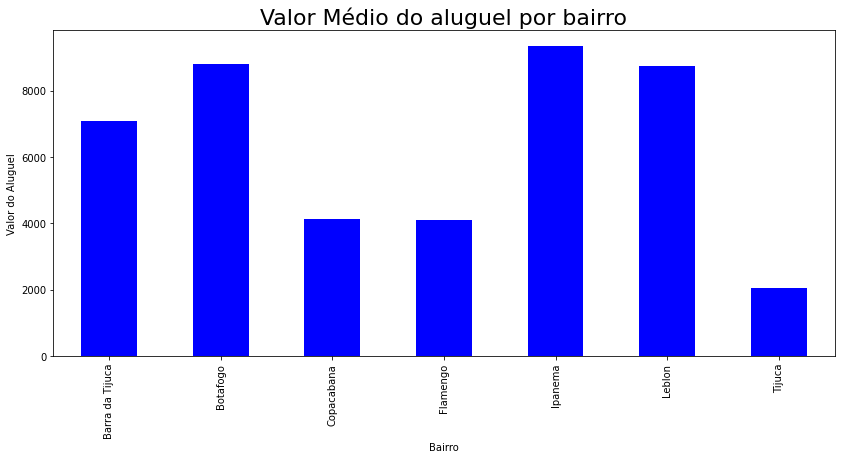

In [ ]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'Blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do aluguel por bairro', {'fontsize' : 22})

Text(0.5, 1.0, 'Valor Médio do aluguel por bairro')

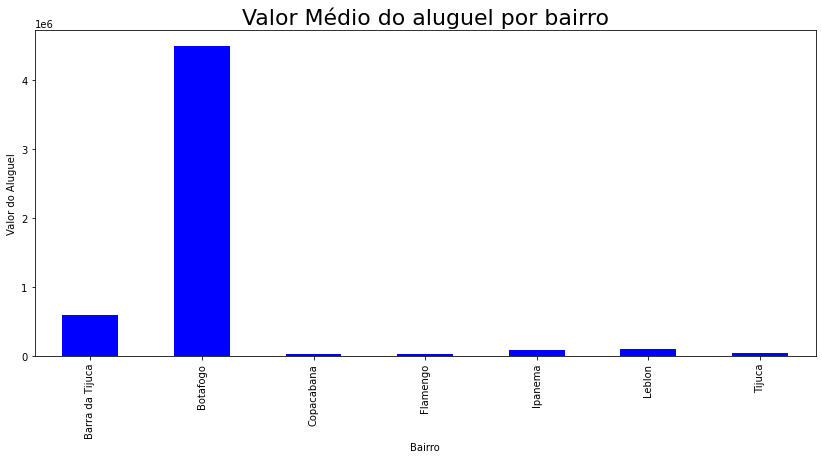

In [ ]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'Blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do aluguel por bairro', {'fontsize' : 22})

# Criando faixas de valor (extra)


In [ ]:
classes = [0,2,4,6,100]
quartos = pd.cut(dados_residencial['Quartos'], classes)

In [ ]:
pd.value_counts(quartos)

(2, 4]      6233
(0, 2]      5406
(4, 6]       463
(6, 100]      29
Name: Quartos, dtype: int64

In [ ]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 ou mais quartos']
quartos = pd.cut(dados_residencial['Quartos'], classes, labels = labels)
quartos

0        1 e 2 quartos
6        5 e 6 quartos
11       1 e 2 quartos
12       1 e 2 quartos
13       3 e 4 quartos
             ...      
22570    3 e 4 quartos
22571    3 e 4 quartos
22572    1 e 2 quartos
22574    5 e 6 quartos
22579    1 e 2 quartos
Name: Quartos, Length: 12216, dtype: category
Categories (4, object): ['1 e 2 quartos' < '3 e 4 quartos' < '5 e 6 quartos' < '7 ou mais quartos']

## Identificando e removendo outliers

<AxesSubplot:>

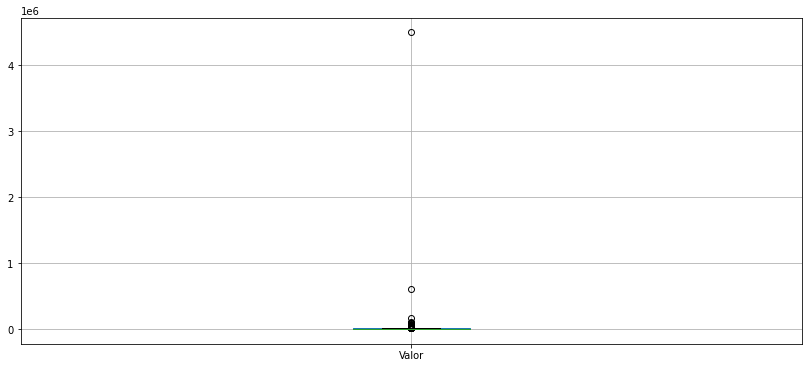

In [ ]:
dados_residencial.boxplot(['Valor'])

In [ ]:
dados_residencial[dados_residencial['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [ ]:
valor = dados_residencial['Valor']

In [ ]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados_residencial[selecao]

<AxesSubplot:>

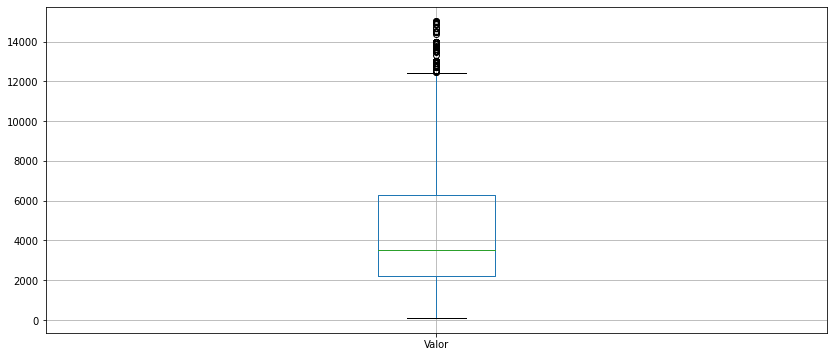

In [ ]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

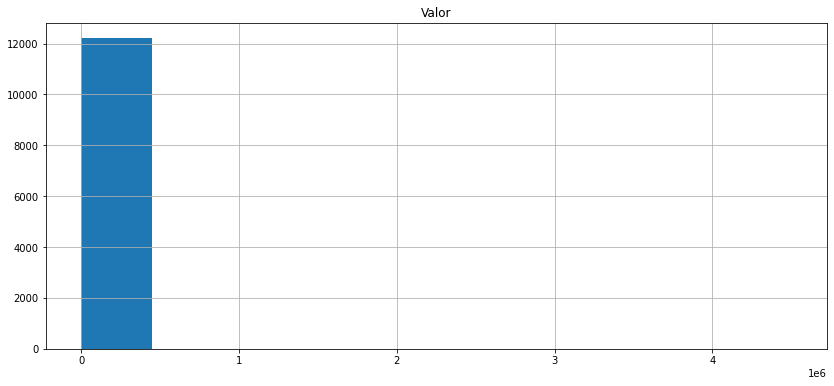

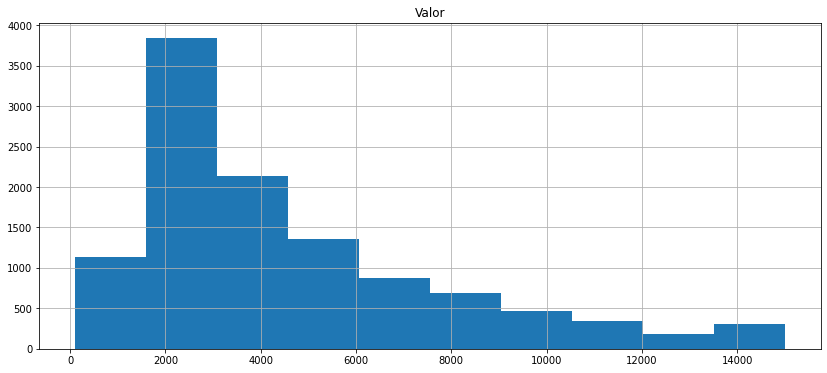

In [ ]:
dados_residencial.hist(['Valor'])
dados_new.hist(['Valor'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

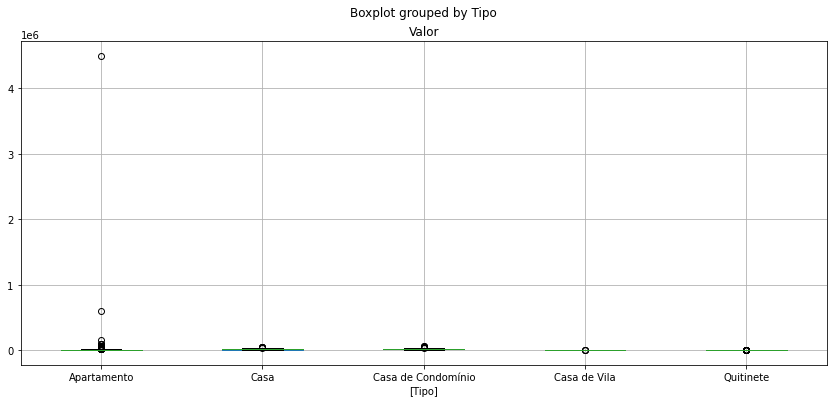

In [ ]:
dados_residencial.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
grupo_tipo = dados_residencial.groupby('Tipo')['Valor']

In [ ]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = dados['Tipo'] == tipo
  eh_dentro_limite = (dados_residencial['Valor'] >= limite_inferior[tipo]) & (dados_residencial['Valor'] <= limite_superior[tipo])
  selecao = eh_tipo & eh_dentro_limite
  dados_selecao = dados_residencial[selecao]
  dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

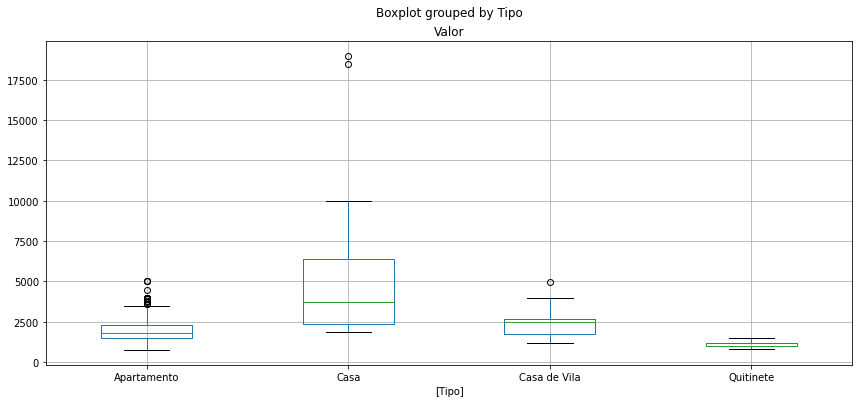

In [ ]:
dados_new.boxplot(['Valor'], by=['Tipo'] )